Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584911
Cost after iteration 200: 0.468157
Cost after iteration 300: 0.377985
Cost after iteration 400: 0.333494
Cost after iteration 500: 0.305956
Cost after iteration 600: 0.283224
Cost after iteration 700: 0.264051
Cost after iteration 800: 0.247613
Cost after iteration 900: 0.233335
Cost after iteration 1000: 0.220802
Cost after iteration 1100: 0.209705
Cost after iteration 1200: 0.199806
Cost after iteration 1300: 0.190921
Cost after iteration 1400: 0.182902
Cost after iteration 1500: 0.175630
Cost after iteration 1600: 0.169008
Cost after iteration 1700: 0.162955
Cost after iteration 1800: 0.157403
Cost after iteration 1900: 0.152296
Cost after iteration 2000: 0.147584
Cost after iteration 2100: 0.143226
Cost after iteration 2200: 0.139186
Cost after iteration 2300: 0.135433
Cost after iteration 2400: 0.131939
Cost after iteration 2500: 0.128679
Cost after iteration 2600: 0.125634
Cost after iteration 2700: 0.122783
Cost

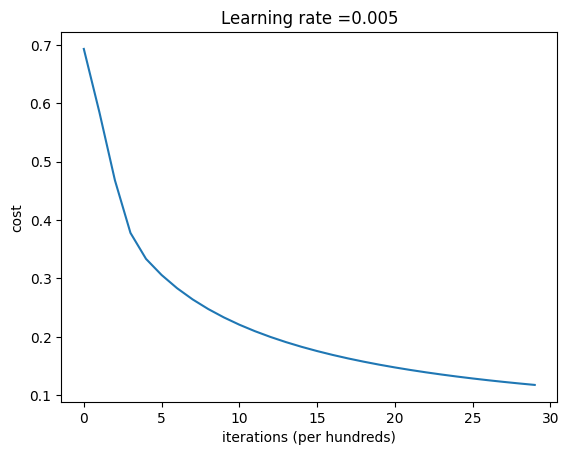

y_predicted = 0 (true label = 1) , you predicted that it is a non-cat picture.


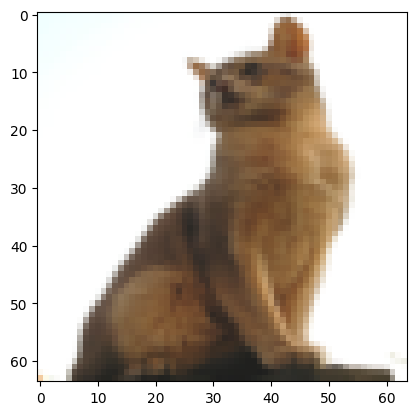

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py # common package to interact with a dataset that is stored on an H5 file.
import scipy
# from PIL import Image
from scipy import ndimage
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 
# print (path)
def load_dataset():

    file_name=  os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name=  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    g -- sigmoid(z)
    """

    # YOUR_CODE. Implement sigmoid function
    # START_CODE 
    g = 1 / (1 + np.exp(-z))
    # END_CODE 
    
    return g
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (1,dim) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (1,dim)
    b -- initialized scalar (corresponds to the bias)
    """
    
    # YOUR_CODE.  Initialize b to zero and w as a vector of zeros. 
    # START_CODE   
    w = np.zeros([1,dim])
    b = 0.0
    # END_CODE 

    assert(w.shape == (1,dim))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y, C=1):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (1,num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[0]
 
    # YOUR_CODE.  implement forward propagation 
    # START_CODE   
    Z = b + np.dot(X, w.T)
    A = sigmoid(Z)
    cost = (-1.0 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + C/(2*m) * np.sum(w**2)
    
    dJ_dw = (1/m) * np.dot((A-Y).T, X) + C*w/m
    dJ_db = (1/m) * np.sum(A - Y)

   # END_CODE 

    assert(dJ_dw.shape == w.shape)
    assert(dJ_db.dtype == float)
    assert(cost.dtype == float)
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, C= 1, verbose = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (1,num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (number of examples,1)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
   
    costs = [] # keep history for plotting if necessary 
    
    for i in range(num_iterations):        

    
        # YOUR_CODE.  Call to compute cost and gradient 
        # START_CODE   
        grads, cost = propagate(w,b,X,Y)
        # END_CODE 
        
        # Retrieve derivatives from grads
        dJ_dw = grads["dJ_dw"]
        dJ_db = grads["dJ_db"]
        
        # YOUR_CODE.  Update paramaters 
        # START_CODE   
        w = w-learning_rate*dJ_dw
        b = b-learning_rate*dJ_db
        # END_CODE 
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if verbose and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dJ_dw": dJ_dw,
             "dJ_db": dJ_db}
    
    return params, grads, costs
def predict(w, b, X):
    def pred(a):
        if a>0.5:
            return 1
        else:
            return 0
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w - weights, a numpy array of size (1,num_px * num_px * 3)
    b - bias, a scalar
    X - data of size (number of examples, num_px * num_px * 3)
    
    Returns:
    Y_prediction - a numpy array of shape (number of examples, 1) containing all predictions (0/1) for the examples in X
    '''
    m,n = X.shape
    assert (w.shape==(1,n))
 
    # YOUR_CODE.  Compute "A" predicting the probabilities of a cat being present in the picture
    # START_CODE   
    A= sigmoid(b+X@w.T)
    # END_CODE 

    # YOUR_CODE.  Convert probabilities to actual predictions 0 or 1 
    # START_CODE   
    vector = np.vectorize(pred)
    Y_prediction=vector(A)
    # END_CODE 
    
    assert(Y_prediction.shape == (m, 1))
    
    return Y_prediction
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, verbose = False, C = 1):
    """
    Builds the logistic regression model by calling the functions implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of examples, num_px * num_px * 3)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (number of examples,1)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    C- regularization parameter 
    
    Returns:
    res -- dictionary containing information about the model.
    """
    
    # YOUR_CODE.
    # START_CODE   

    #  initialize parameters
    dim = X_train.shape[1]
    w, b = initialize_with_zeros(dim)
    
    # run gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, C, verbose)
    
    # retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']
    
    # predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # END_CODE 

    # Print train/test Errors
    print("train accuracy= {:.3%}".format(np.mean(Y_prediction_train == Y_train)))
    print("test accuracy= {:.3%}".format(np.mean(Y_prediction_test == Y_test)))
    
    res = {'costs': costs,
           'Y_prediction_test': Y_prediction_test, 
           'Y_prediction_train' : Y_prediction_train, 
           'w' : w, 
           'b' : b,
           'learning_rate' : learning_rate,
           'num_iterations': num_iterations,
           'C':C
          }
    
    return res
X_train,Y_train, X_test, Y_test, classes = load_dataset()

# YOUR_CODE.   get m_train, num_px and m_test
# START_CODE 
m_train = X_train.shape[0]
num_px = X_test.shape[1]
m_test = X_test.shape[0]
# END_CODE 

# YOUR_CODE. Reshape the training and test set to shape (number_of_samples,  num_px*num_px*3)
# START_CODE 
X_train_flatten = X_train.reshape(X_train.shape[0],-1)
X_test_flatten =  X_test.reshape(X_test.shape[0],-1)
# END_CODE
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

res = model(X_train= X_train_scaled,
            Y_train=Y_train, 
            X_test=X_test_scaled, 
            Y_test= Y_test, 
            num_iterations = 3000, 
            learning_rate = 0.005, 
            verbose = True,
            C= 0.3 # 0.6 is still overfitting,   0.3  is low value to keep the test accuracy ashigh as possible
           )
costs = np.squeeze(res['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(res["learning_rate"]))
plt.show()


<img src="1.png">

<img src="2.png">

In [ ]:
index = 1

plt.imshow(X_test[index,:].reshape(num_px, num_px, 3))
y_true = Y_test[index,0]
y_predicted =  res["Y_prediction_test"][index,0]
print ('y_predicted = {} (true label = {}) , you predicted that it is a {} picture.'.\
       format(y_predicted,
              y_true,
              classes[y_predicted]))

<img src="1cat.png">

In [ ]:
# index = 6 is example of a picture that was wrongly classified.
index = 6
plt.imshow(X_test[index,:].reshape(num_px, num_px, 3))
y_true = Y_test[index,0]
y_predicted =  res["Y_prediction_test"][index,0]
print ('y_predicted = {} (true label = {}) , you predicted that it is a {} picture.'.\
       format(y_predicted,
              y_true,
              classes[y_predicted]))
# todo it looks like it does not use predicted value but test label instead 

<img src="2cat.png">